In [1]:
import matplotlib.pyplot as plt
from nmf_son.base import nmf_son
from nmf_son.andersen_acceleration import nmf_son_z_accelerated, nmf_son_all_accelerated
from nmf_son.unnamed_acceleration import nmf_son_acc
from nmf_son.utils import *


np.random.seed(42)
np.set_printoptions(precision=3)

In [2]:
def plot_scores(base_scores, scores_arr, ver_names):
    fig, axs = plt.subplots(2, len(scores_arr), figsize=(20, 10), sharey='row')

    scores_arr = np.array(scores_arr)
    min_val = np.min(scores_arr[~np.isnan(scores_arr)])

    for idx in range(len(scores_arr)):
        axs[0, idx].set_yscale('log')
        axs[0, idx].set_title(ver_names[idx], fontsize=16)
        axs[0, idx].plot(base_scores, color='black', linewidth=3, label='base')
        axs[0, idx].plot(scores_arr[idx], color='cyan', linewidth=1.5, label=ver_names[idx])
        axs[0, idx].legend()

        axs[1, idx].set_yscale('log')
        axs[1, idx].plot(scores_arr[idx] - min_val, color='cyan', linewidth=1.5, label=ver_names[idx])
        axs[1, idx].legend()

In [3]:
X = np.load('datasets/jasper_full.npz')['X']
rank = 8

data = np.load(f'saved_models/jasper/jasper_full_r{rank}_ini.npz')
ini_W = data['W']
ini_H = data['H']

reg = 15
save_filepath = 'saved_models/urban/acc_testing/r{}_l{}_{}.npz'

## Rank = 8

In [4]:
aa_size = 2
max_iter = 3000

In [5]:
%%time
Wb_base, Hb_base, Wl_base, Hl_base, fscores_base, gscores_base, lambda_vals_base = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter)

CPU times: total: 2h 29min 21s
Wall time: 1h 22min 9s


In [6]:
save_results(save_filepath.format(rank, reg, 'base'), Wb_base, Hb_base, Wl_base, Hl_base, fscores_base, gscores_base, lambda_vals_base)
# # Wb_base, Hb_base, Wl_base, Hl_base, fscores_base, gscores_base, lambda_vals_base = load_results(acc_filepath.format(rank, iters, reg, 'base'))

In [7]:
%%time
Wb_z2, Hb_z2, Wl_z2, Hl_z2, fscores_z2, gscores_z2, lambda_vals_z2 = nmf_son_z_accelerated(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter, andersen_win=aa_size)

CPU times: total: 3h 48min 29s
Wall time: 2h 6min 40s


In [8]:
save_results(save_filepath.format(rank, reg, 'z2'), Wb_z2, Hb_z2, Wl_z2, Hl_z2, fscores_z2, gscores_z2, lambda_vals_z2)
# Wb_z2, Hb_z2, Wl_z2, Hl_z2, fscores_z2, gscores_z2, lambda_vals_z2 = load_results(acc_filepath.format(rank, iters, reg, 'z2'))

In [9]:
%%time
Wb_all2, Hb_all2, Wl_all2, Hl_all2, fscores_all2, gscores_all2, lambda_vals_all2 = nmf_son_all_accelerated(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter, andersen_win=aa_size)

CPU times: total: 7h 36min 34s
Wall time: 4h 12min 53s


In [10]:
save_results(save_filepath.format(rank, reg, 'all2'), Wb_all2, Hb_all2, Wl_all2, Hl_all2, fscores_all2, gscores_all2, lambda_vals_all2)
# Wb_all2, Hb_all2, Wl_all2, Hl_all2, fscores_all2, gscores_all2, lambda_vals_all2 = load_results(acc_filepath.format(rank, iters, reg, 'all2'))

In [11]:
%%time
Wb_acc, Hb_acc, Wl_acc, Hl_acc, fscores_acc, gscores_acc, lambda_vals_acc = nmf_son_acc(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter)

CPU times: total: 3h 51min 57s
Wall time: 2h 4min 57s


In [12]:
save_results(save_filepath.format(rank, reg, 'unnamed'), Wb_acc, Hb_acc, Wl_acc, Hl_acc, fscores_acc, gscores_acc, lambda_vals_acc)
# Wb_acc, Hb_acc, Wl_acc, Hl_acc, fscores_acc, gscores_acc, lambda_vals_acc = load_results(acc_filepath.format(rank, iters, reg, 'acc'))

In [13]:
total_scores_base = fscores_base + lambda_vals_base * gscores_base
total_scores_z2 = fscores_z2 + lambda_vals_z2 * gscores_z2
total_scores_all2 = fscores_all2+ lambda_vals_all2 * gscores_all2
total_scores_acc = fscores_acc + lambda_vals_acc * gscores_acc

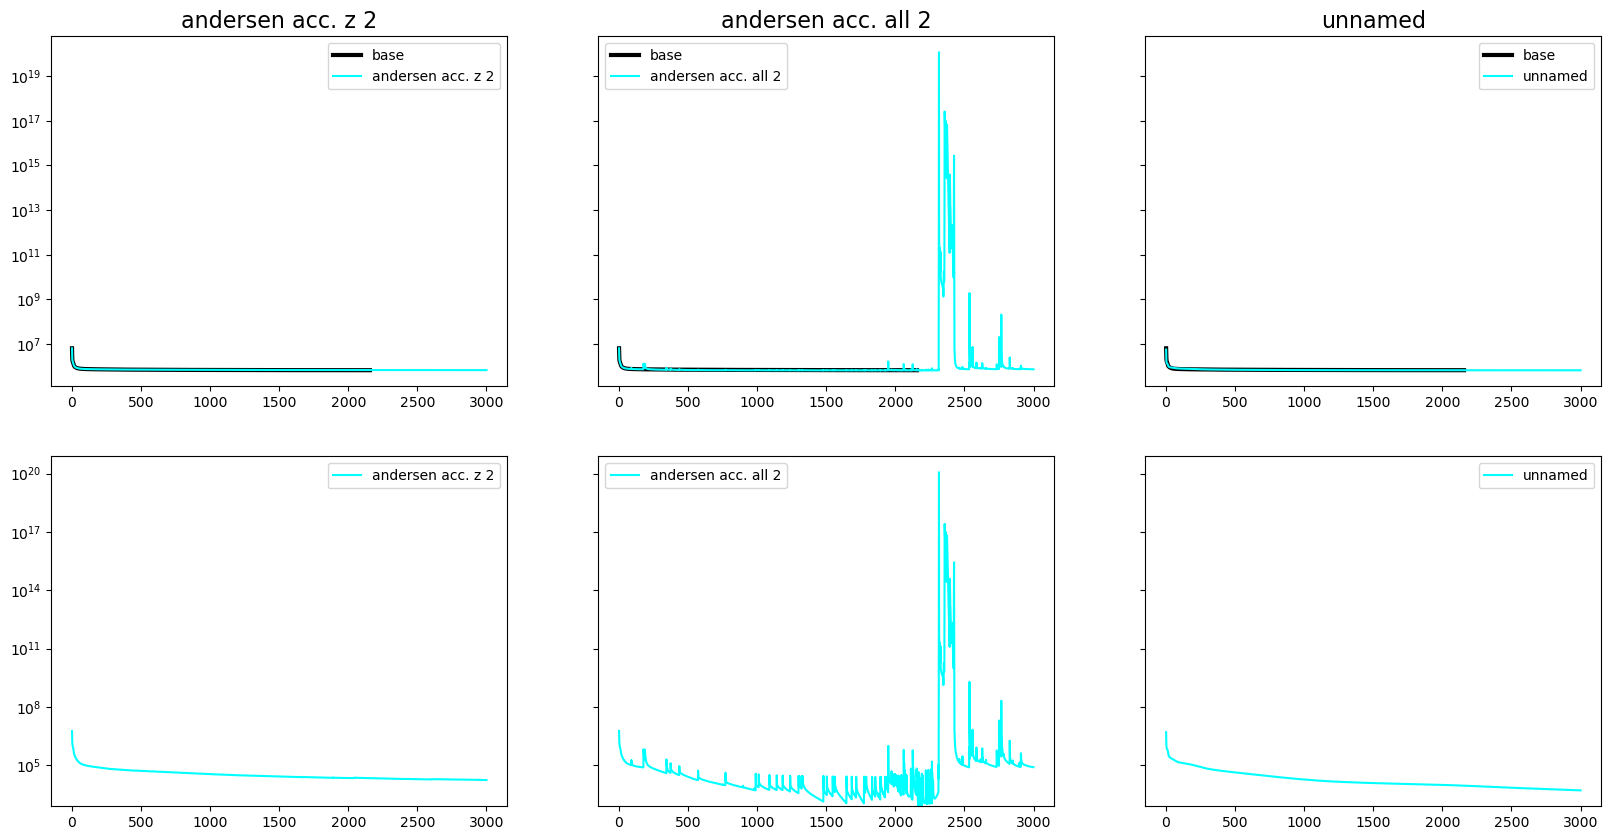

In [14]:
plot_scores(total_scores_base, [total_scores_z2, total_scores_all2, total_scores_acc], ['andersen acc. z 2', 'andersen acc. all 2', 'unnamed'])

In [15]:
Wb_z3, Hb_z3, Wl_z3, Hl_z3, fscores_z3, gscores_z3, lambda_vals_z3 = nmf_son_z_accelerated(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter, andersen_win=3)
Wb_z4, Hb_z4, Wl_z4, Hl_z4, fscores_z4, gscores_z4, lambda_vals_z4 = nmf_son_z_accelerated(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter, andersen_win=4)

KeyboardInterrupt: 

In [ ]:
save_results(save_filepath.format(rank, reg, 'z3'), Wb_z3, Hb_z3, Wl_z3, Hl_z3, fscores_z3, gscores_z3, lambda_vals_z3)
save_results(save_filepath.format(rank, reg, 'z4'), Wb_z4, Hb_z4, Wl_z4, Hl_z4, fscores_z4, gscores_z4, lambda_vals_z4)
# Wb_z3, Hb_z3, Wl_z3, Hl_z3, fscores_z3, gscores_z3, lambda_vals_z3 = load_results(acc_filepath.format(rank, iters, reg, 'z3'))
# Wb_z4, Hb_z4, Wl_z4, Hl_z4, fscores_z4, gscores_z4, lambda_vals_z4 = load_results(acc_filepath.format(rank, iters, reg, 'z4'))

In [ ]:
total_scores_z3 = fscores_z3 + lambda_vals_z3 * gscores_z3
total_scores_z4 = fscores_z4 + lambda_vals_z4 * gscores_z4

In [ ]:
plot_scores(total_scores_base, [total_scores_z2, total_scores_z3, total_scores_z4], ['andersen acc. z 2', 'andersen acc. z 3', 'andersen acc. z 4'])

In [ ]:
Wb_all3, Hb_all3, Wl_all3, Hl_all3, fscores_all3, gscores_all3, lambda_vals_all3 = nmf_son_all_accelerated(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter, andersen_win=3)
Wb_all4, Hb_all4, Wl_all4, Hl_all4, fscores_all4, gscores_all4, lambda_vals_all4 = nmf_son_all_accelerated(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter, andersen_win=4)

In [ ]:
save_results(save_filepath.format(rank, reg, 'all3'), Wb_all3, Hb_all3, Wl_all3, Hl_all3, fscores_all3, gscores_all3, lambda_vals_all3)
save_results(save_filepath.format(rank, reg, 'all4'), Wb_all4, Hb_all4, Wl_all4, Hl_all4, fscores_all4, gscores_all4, lambda_vals_all4)
# Wb_all3, Hb_all3, Wl_all3, Hl_all3, fscores_all3, gscores_all3, lambda_vals_all3 = load_results(acc_filepath.format(rank, iters, reg, 'all3'))
# Wb_all4, Hb_all4, Wl_all4, Hl_all4, fscores_all4, gscores_all4, lambda_vals_all4 = load_results(acc_filepath.format(rank, iters, reg, 'all4'))

In [ ]:
total_scores_all3 = fscores_all3 + lambda_vals_all3 * gscores_all3
total_scores_all4 = fscores_all4 + lambda_vals_all4 * gscores_all4

In [ ]:
plot_scores(total_scores_base, [total_scores_all2, total_scores_all3, total_scores_all4], ['andersen acc. all 2', 'andersen acc. all 3', 'andersen acc. all 4'])